In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
import pickle
from google.colab import files


In [5]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/New_DataSet.csv")

# Display the first few rows of the dataset to understand its structure
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0            0      171             80             34       23  43.509726   
1            8       92             93             47       36  21.240576   
2            7      115             47             52       35  41.511523   
3            9      103             78             25      304  29.582192   
4            1       85             59             27       35  42.604536   

   DiabetesPedigreeFunction  Age  Outcome  
0                  1.213191   21        0  
1                  0.158365   23        0  
2                  0.079019   23        0  
3                  1.282870   43        1  
4                  0.549542   22        0  


In [6]:
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,171,80,34,23,43.509726,1.213191,21,0
1,8,92,93,47,36,21.240576,0.158365,23,0
2,7,115,47,52,35,41.511523,0.079019,23,0
3,9,103,78,25,304,29.582192,1.282870,43,1
4,1,85,59,27,35,42.604536,0.549542,22,0


In [7]:
data.shape

(10000, 9)

In [8]:
# %%
# getting the statistical measures of the data
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.25580,107.850200,71.207500,28.81760,139.243600,31.567022,0.400944,30.134100,0.334400
std,3.40572,31.920909,16.801478,14.50648,133.777919,9.804366,0.381463,12.106047,0.471804
min,0.00000,44.000000,24.000000,7.00000,14.000000,18.200807,0.078044,21.000000,0.000000
25%,0.00000,84.000000,58.000000,15.00000,39.000000,21.247427,0.137065,22.000000,0.000000
50%,2.00000,105.000000,72.000000,31.00000,85.000000,31.922421,0.199698,24.000000,0.000000
75%,6.00000,129.000000,85.000000,41.00000,197.000000,39.328921,0.621158,35.000000,1.000000
max,14.00000,192.000000,117.000000,92.00000,796.000000,56.034628,2.301594,77.000000,1.000000


In [9]:
# %%
# 0--> Non - Diabetic
# 1--> Diabetic
data['Outcome'].value_counts()

# %% [markdown]

,count
Outcome,
0,6656
1,3344


In [10]:
df_class_0 = data[data["Outcome"]==0]
df_class_1 = data[data["Outcome"]==1]

In [11]:
print("After undersampling", len(df_class_0), len(df_class_1))


After undersampling 6656 3344


In [12]:
df_class_0 = df_class_0.sample(len(df_class_1))

print("After undersampling" , len(df_class_0), len(df_class_1))

data = pd.concat([df_class_0, df_class_1])


After undersampling 3344 3344


In [13]:
data['Outcome'].value_counts()

# %%
data.groupby('Outcome').mean()

# %%
# separating the data and labels
X = data.drop(columns = 'Outcome', axis=1)
Y = data['Outcome']


In [14]:
print(X)

# %%
print(Y)

# %% [markdown]
# Train Test Split

# %%
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=42)

# %% [markdown]
# Feature Selection using Recursive Feature Elimination (RFE) with Random Forest

# %%
rf = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=5)
rfe.fit(X_train, Y_train)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
5080            1      101             53             34       37  43.337917   
6657            0      114             69             44       23  19.097586   
2219            1       81             63             12       37  37.894272   
5267            1       76             79             34       57  35.390758   
1300            7      119             49             39       33  21.646046   
...           ...      ...            ...            ...      ...        ...   
9982            1      108             61             43       91  30.601530   
9985            2      100             47             25      305  31.021941   
9991            4      140             94             25      170  32.448878   
9992            4      100             83             34       49  26.273109   
9997            5       99             59             47       67  30.774018   

      DiabetesPedigreeFunction  Age  
5

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=5)

In [15]:
selected_features = X.columns[rfe.support_]
print("Selected Features: ", selected_features)

X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# %% [markdown]
# Training and Evaluating Logistic Regression Model

# %%
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_selected, Y_train)

# %%
lr_predictions = lr_model.predict(X_test_selected)
print("Logistic Regression Predictions:", lr_predictions)


Selected Features:  Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age'], dtype='object')
Logistic Regression Predictions: [0 1 0 ... 1 1 0]


Logistic Regression Accuracy: 0.7511210762331838


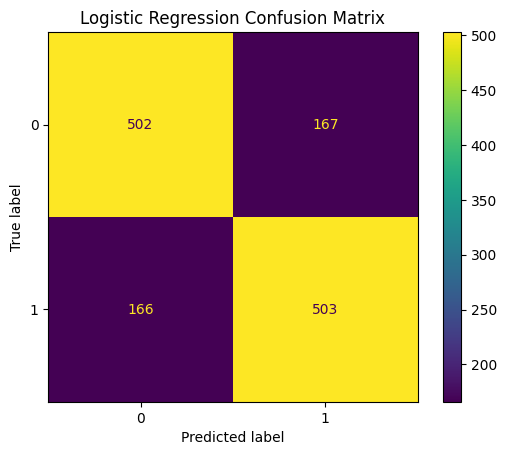

In [16]:
lr_accuracy = accuracy_score(lr_predictions, Y_test)
print("Logistic Regression Accuracy:", lr_accuracy)

# %%
lr_precision = precision_score(Y_test, lr_predictions)
lr_recall = recall_score(Y_test, lr_predictions)
lr_f1 = f1_score(Y_test, lr_predictions)

lr_cm = confusion_matrix(Y_test, lr_predictions)
ConfusionMatrixDisplay(lr_cm).plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()


In [17]:
# %%
# Calculating Type 1 and Type 2 errors, and Specificity
lr_tn, lr_fp, lr_fn, lr_tp = lr_cm.ravel()
lr_type_1_error = lr_fp / (lr_fp + lr_tn)
lr_type_2_error = lr_fn / (lr_tp + lr_fn)
lr_specificity = lr_tn / (lr_tn + lr_fp)

# %% [markdown]
# Training and Evaluating SVM Model

# %%
svm_model = SVC()
svm_model.fit(X_train_selected, Y_train)

# %%
svm_predictions = svm_model.predict(X_test_selected)
print("SVM Predictions:", svm_predictions)

SVM Predictions: [0 1 0 ... 1 1 0]


SVM Accuracy: 0.7720478325859492


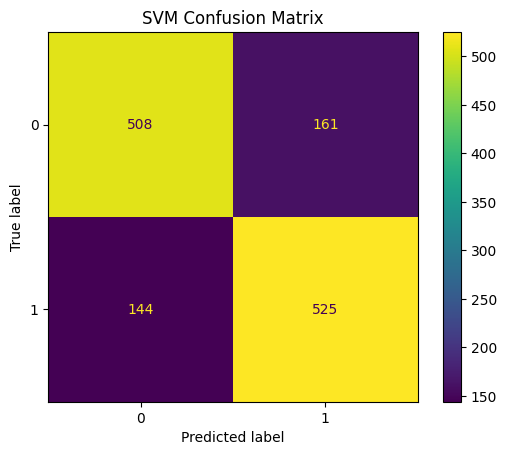

In [18]:
# %%
svm_accuracy = accuracy_score(svm_predictions, Y_test)
print("SVM Accuracy:", svm_accuracy)

# %%
svm_precision = precision_score(Y_test, svm_predictions)
svm_recall = recall_score(Y_test, svm_predictions)
svm_f1 = f1_score(Y_test, svm_predictions)

svm_cm = confusion_matrix(Y_test, svm_predictions)
ConfusionMatrixDisplay(svm_cm).plot()
plt.title("SVM Confusion Matrix")
plt.show()


In [19]:
# %%
# Calculating Type 1 and Type 2 errors, and Specificity
svm_tn, svm_fp, svm_fn, svm_tp = svm_cm.ravel()
svm_type_1_error = svm_fp / (svm_fp + svm_tn)
svm_type_2_error = svm_fn / (svm_tp + svm_fn)
svm_specificity = svm_tn / (svm_tn + svm_fp)

# %% [markdown]
# Training and Evaluating Random Forest Model

# %%
rf_model = RandomForestClassifier()
rf_model.fit(X_train_selected, Y_train)

# %%
rf_predictions = rf_model.predict(X_test_selected)
print("Random Forest Predictions:", rf_predictions)

# %%
rf_accuracy = accuracy_score(rf_predictions, Y_test)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Predictions: [0 1 0 ... 1 1 0]
Random Forest Accuracy: 0.9095665171898356


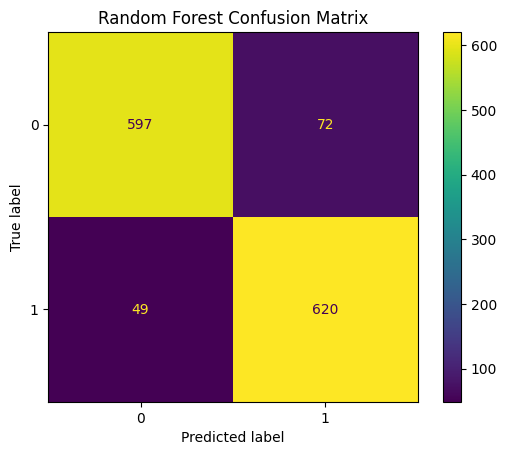

In [20]:
rf_precision = precision_score(Y_test, rf_predictions)
rf_recall = recall_score(Y_test, rf_predictions)
rf_f1 = f1_score(Y_test, rf_predictions)

rf_cm = confusion_matrix(Y_test, rf_predictions)
ConfusionMatrixDisplay(rf_cm).plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

# %%
# Calculating Type 1 and Type 2 errors, and Specificity
rf_tn, rf_fp, rf_fn, rf_tp = rf_cm.ravel()
rf_type_1_error = rf_fp / (rf_fp + rf_tn)
rf_type_2_error = rf_fn / (rf_tp + rf_fn)
rf_specificity = rf_tn / (rf_tn + rf_fp)


In [21]:
print(f"Logistic Regression Accuracy: {lr_accuracy}")
print(f"Logistic Regression Precision: {lr_precision}")
print(f"Logistic Regression Recall: {lr_recall}")
print(f"Logistic Regression F1 Score: {lr_f1}")
print(f"Logistic Regression Type 1 Error: {lr_type_1_error}")
print(f"Logistic Regression Type 2 Error: {lr_type_2_error}")
print(f"Logistic Regression Specificity: {lr_specificity}")

print(f"SVM Accuracy: {svm_accuracy}")
print(f"SVM Precision: {svm_precision}")
print(f"SVM Recall: {svm_recall}")
print(f"SVM F1 Score: {svm_f1}")
print(f"SVM Type 1 Error: {svm_type_1_error}")
print(f"SVM Type 2 Error: {svm_type_2_error}")
print(f"SVM Specificity: {svm_specificity}")

print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Random Forest Precision: {rf_precision}")
print(f"Random Forest Recall: {rf_recall}")
print(f"Random Forest F1 Score: {rf_f1}")
print(f"Random Forest Type 1 Error: {rf_type_1_error}")
print(f"Random Forest Type 2 Error: {rf_type_2_error}")
print(f"Random Forest Specificity: {rf_specificity}")

Logistic Regression Accuracy: 0.7511210762331838
Logistic Regression Precision: 0.7507462686567165
Logistic Regression Recall: 0.7518684603886397
Logistic Regression F1 Score: 0.7513069454817027
Logistic Regression Type 1 Error: 0.24962630792227206
Logistic Regression Type 2 Error: 0.24813153961136025
Logistic Regression Specificity: 0.750373692077728
SVM Accuracy: 0.7720478325859492
SVM Precision: 0.7653061224489796
SVM Recall: 0.7847533632286996
SVM F1 Score: 0.7749077490774909
SVM Type 1 Error: 0.2406576980568012
SVM Type 2 Error: 0.21524663677130046
SVM Specificity: 0.7593423019431988
Random Forest Accuracy: 0.9095665171898356
Random Forest Precision: 0.8959537572254336
Random Forest Recall: 0.9267563527653214
Random Forest F1 Score: 0.9110947832476121
Random Forest Type 1 Error: 0.10762331838565023
Random Forest Type 2 Error: 0.07324364723467862
Random Forest Specificity: 0.8923766816143498


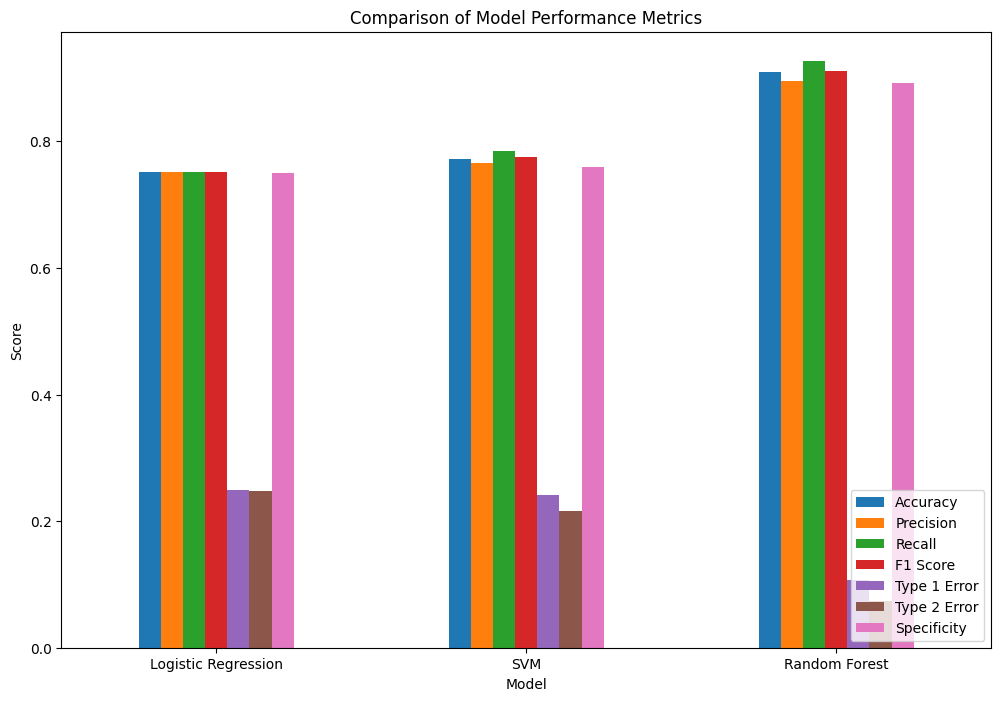

In [22]:
metrics = {
    "Model": ["Logistic Regression", "SVM", "Random Forest"],
    "Accuracy": [lr_accuracy, svm_accuracy, rf_accuracy],
    "Precision": [lr_precision, svm_precision, rf_precision],
    "Recall": [lr_recall, svm_recall, rf_recall],
    "F1 Score": [lr_f1, svm_f1, rf_f1],
    "Type 1 Error": [lr_type_1_error, svm_type_1_error, rf_type_1_error],
    "Type 2 Error": [lr_type_2_error, svm_type_2_error, rf_type_2_error],
    "Specificity": [lr_specificity, svm_specificity, rf_specificity]
}

metrics_df = pd.DataFrame(metrics)
metrics_df.set_index("Model", inplace=True)

metrics_df.plot(kind="bar", figsize=(12, 8))
plt.title("Comparison of Model Performance Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()


In [23]:
# %%
input_data = (5,106,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Selecting the features used in training
input_data_selected = rfe.transform(input_data_reshaped)

prediction = rf_model.predict(input_data_selected)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')


[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(


In [24]:
filename = 'diabetes_model.pkl'
pickle.dump(rf_model, open(filename, 'wb'))

# %%
# loading the saved model
loaded_model = pickle.load(open(filename, 'rb'))

# %%
files.download(filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Selecting the features used in training
input_data_selected = rfe.transform(input_data_reshaped)

prediction = loaded_model.predict(input_data_selected)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')


[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(


<ipython-input-26-8ba80bb50d82>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")


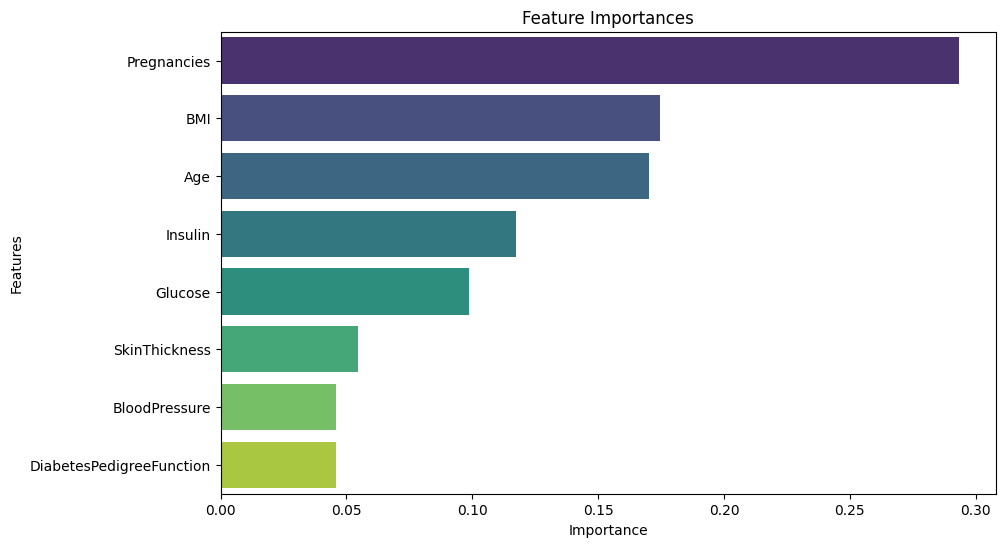

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming you have loaded your data into a DataFrame 'data' with features and target
# For example:
# X = data.drop(columns=['target_column'])
# y = data['target_column']

# Example loading data directly from CSV
data = pd.read_csv("/content/New_DataSet.csv")

# Separate features (X) and target variable (y)
X = data.drop(columns=['Outcome'])  # Assuming 'Outcome' is the target column
y = data['Outcome']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your RandomForestClassifier model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Calculate feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plotting feature importances using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [27]:
from tabulate import tabulate
from sklearn.metrics import confusion_matrix

# Example confusion matrix values (replace with actual values)
conf_matrices = {
    "Logistic Regression": confusion_matrix(Y_test, lr_predictions),
    "SVM": confusion_matrix(Y_test, svm_predictions),
    "Random Forest": confusion_matrix(Y_test, rf_predictions),
}

# Flatten confusion matrix to display
def flatten_confusion_matrix(cm):
    return [cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]]

# Calculate and flatten confusion matrices
conf_matrix_values = {
    model: flatten_confusion_matrix(cm) for model, cm in conf_matrices.items()
}

# Metrics dictionary (replace with actual values)
metrics = {
    "Model": ["Logistic Regression", "SVM", "Random Forest"],
    "Accuracy": [lr_accuracy, svm_accuracy, rf_accuracy],
    "Precision": [lr_precision, svm_precision, rf_precision],
    "Recall": [lr_recall, svm_recall, rf_recall],
    "F1 Score": [lr_f1, svm_f1, rf_f1],
    "Specificity": [lr_specificity, svm_specificity, rf_specificity]
}

# Create table data with confusion matrix values
table = [
    [
        metrics["Model"][i],
        round(metrics["Accuracy"][i], 2),
        round(metrics["Precision"][i], 2),
        round(metrics["Recall"][i], 2),
        round(metrics["F1 Score"][i], 2),
        round(metrics["Specificity"][i], 2),
        *conf_matrix_values[metrics["Model"][i]]
    ]
    for i in range(len(metrics["Model"]))
]

# Define the headers including confusion matrix components
headers = [
    "Model", "Accuracy", "Precision", "Recall", "F1 Score",
    "Specificity",
    "TP", "FN", "FP", "TN"
]

# Print the table with tabulate
print(tabulate(table, headers, tablefmt="grid"))


+---------------------+------------+-------------+----------+------------+---------------+------+------+------+------+
| Model               |   Accuracy |   Precision |   Recall |   F1 Score |   Specificity |   TP |   FN |   FP |   TN |
+=====================+============+=============+==========+============+===============+======+======+======+======+
| Logistic Regression |       0.75 |        0.75 |     0.75 |       0.75 |          0.75 |  502 |  167 |  166 |  503 |
+---------------------+------------+-------------+----------+------------+---------------+------+------+------+------+
| SVM                 |       0.77 |        0.77 |     0.78 |       0.77 |          0.76 |  508 |  161 |  144 |  525 |
+---------------------+------------+-------------+----------+------------+---------------+------+------+------+------+
| Random Forest       |       0.91 |        0.9  |     0.93 |       0.91 |          0.89 |  597 |   72 |   49 |  620 |
+---------------------+------------+------------